#### FrozenLake 게임 환경 생성

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random

#pip install gym

#최대값이 모두 같을 때 random하게 return하도록 작성한 코드.  
#최대값이 있으면 걔를 return함
def rargmax(vector):     
    m = np.max(vector)
    indices = np.nonzero(vector == m)[0]
    return random.choice(indices)

register(  #게임설정 (게임이름을 id로 따로 다시 지정 등 환경설정)
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': False}
)
env = gym.make ('FrozenLake-v3')

#### Q table 초기화

In [2]:
# Q를 모두 0으로 초기화.  Q[16,4]
# Q테이블 만들기 위해 비슷하게만들려고 16행 4개열로 만들고 1행이 Q테이블의 state1개의미
# 행안의 열들이 왼쪽,오른쪽,아래,위의 값 가짐
#np.zeros(현재 환경의 상태의수, 액션의 수) =16,4
Q = np.zeros ([env.observation_space.n, env.action_space.n]) 
num_episodes = 2000

#### 강화 학습 (Q learning을 통한) 
학습을 하면서 게임을 하므로 게임 초반에는 실패가 많으나 후반으로 갈수록 성공 확률이 높아진다.

In [3]:
#강화학습은 실제로 환경만들기가 제일 어렵다. 우리는 만들어진 환경 가져오는거

# create lists to contain total rewards and steps per episode
rList = []
for i in range(num_episodes): # 여러번 반복 학습 (2000번 게임함)
    state =  env.reset()  # 환경 reset 후, 첫번째 상태 얻음 
    rAll = 0
    done = False

    # The Q-Table learning algorithm
    while not done: #게임 끝날때까지 반복
        
        #현재 state의 Q중 최대 reward를 얻을 수 있는 action을 구함. 
        #다 0이면 random하게 선택, 만약 1이 생기면 2가 생긴 action값을 취함
        action = rargmax(Q[state,:])

        # 환경에서 action 후, new_state와 reward를 얻음
        # action ( 0 - left, 1 -douwn, 2-right, 3-up )
        new_state,reward,done, _= env.step(action)
        
        # Q-Table 갱신 (새로 얻은 상태정보 같은거 업뎃)
        #reward와 새로갱신한 상태의 최대값
        Q[state,action]=reward+np.max(Q[new_state,:]) 

        rAll += reward #reward합 받음. 최대값은 1일수밖에없음
        state = new_state
    rList.append(rAll) #rList가 2000번 게임이 각각끝났을때 0이나 1로 끝났는지 저장


#### 게임 결과 출력
(학습을 하면서 게임을 하므로 게임 초반에는 실패가 많으나 후반으로 갈수록 성공 확률이 높아진다.)

Success rate: 0.946
Final Q-Table Values
LEFT DOWN RIGHT UP
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]


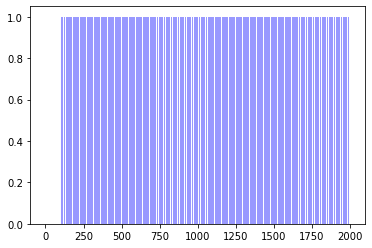

In [4]:
print("Success rate: " + str(sum(rList) / num_episodes)) #게임에서얻은 reward/게임횟수
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)

#rList 그림 그려보면 초반에는 0이많지만 뒤로갈수록 길을 알게되기때문에 1이 많아짐
plt.bar(range(len(rList)), rList, color="b", alpha=0.4) 
plt.show()

#### 단점: 길이 한번만들어지면 계속 그 길로만 안내한다